-**Clustering** is a machine learning technique that uses unsupervised learning
- Group unlabelled data into natural clusters
- Clustering is an optimisation problem
- $variability(c) = \sum_{e \in c}distance(mean(c),e)^2$
- Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad
- $dissimilarity(C) = \sum_{c in C}variability(c)$
- Find a C that minimises the dissimilarity
- In order not to end up as each point being a clutser we add a constraint e.g. the clusters have to have some minimum distance between them or we can constrain the number of clusters

**Hierarchical clustering**
- Start by assigning each item to a cluster so that if you have N items you have N clusters, each containing just one item
- Find the closest (most similar) pair of clusters and merge then into a single cluster, so that now you have one fewer clusters
- Continue until all items are clustered into a single cluster of size N
- Agglomerative hierarchical clustering
- What do we mean by closest?
- **Single Linkage**: consider the distance between one cluster and another cluster to be equal to the shortest distance from any member of one cluster to any member of the other cluster
- **Complete Linkage**: consider the distance between one cluster and another to be equal to the greatest distance from any member of one cluster to any member of the other cluster
- **Average Linkage**: consider the distance between one cluster and another cluster to be the average distance from any member of one cluster to any member of the other cluster

|BOS|NY|CHI|DEN|SF|SEA|
|--|--|--|--|--|--
|0|206|963|1949|3095|2979|
|0|0|802|1771|2934|2815|
|0|0|0|966|1235|1307|
|0|0|0|0|1235|1307|
|0|0|0|0|0|808|
  

**Clusters**
- [BOS, NY] [CHI [DEN] [SF] [SEA]
- [BOS, NY, CHI] [DEN] [SF] [SEA]
- [BOS, NY, CHI] [DEN] [SF, SEA]
- **Single**: [BOS, NY, CHI, DEN] [SF, SEA]
- **Complete**: [BOS, NY, CHI] [DEN, SF, SEA]

**Pros and cons of hierarchical clustering**
- Get a history of dendrograms
- Deterministic given a linkage metric
- Answer might not be optimial. Greedy algorithm. Making locally optimal decisions at each point may or may not give us a globally optimal solution
- Flexible
- Really slow, complexity $O(n^3)$. Not something you want to work with on large data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


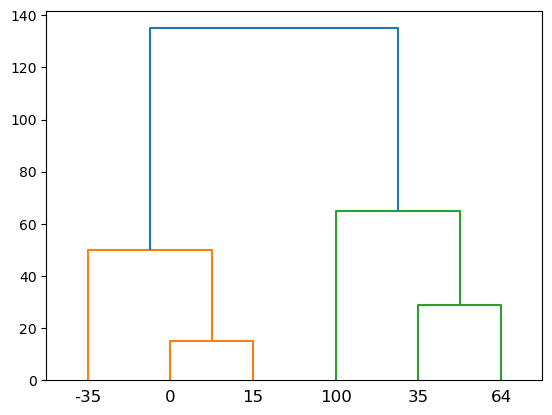

In [32]:
data = [0, 15, 35, 64, 100, -35]
z = np.reshape(data, (len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(z, method='complete'), labels=data)

In [5]:
z

array([[ 0],
       [ 4],
       [ 6],
       [30],
       [39],
       [52],
       [56],
       [58]])

In [23]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979],
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 2142, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 2142, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]

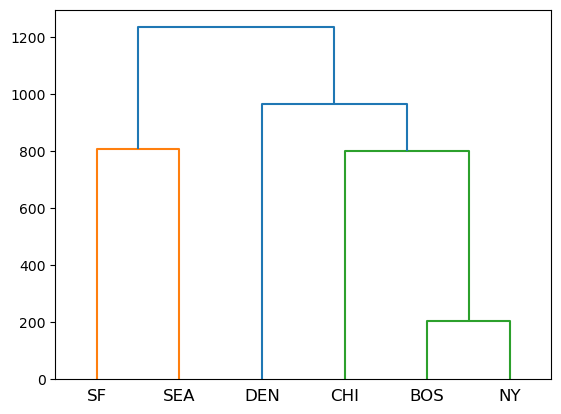

In [29]:
from scipy.spatial.distance import squareform
condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='single'), labels=airports)

**k-means clustering**
- k is the number of clusters we want
- If you don't have any idea about how many clusters there are this is problematic
- If you know how many clusters you want, it is a good choice as it much faster

**k-means algorithm**
- Randomly choose k samples as initial centroids
- while True:
- create k clusters by assigning each point to the nearest cluster
- compute k new centroids by averaging the points in each cluster
- if centroids don't change
- exit

- Complexity of one iteration
- Compare each point with each centoid - k*n
- Typically it converges quite quickly
- Most commonly used clustering algorithm as it is very fast

**Choosing k**
- Choosing the wrong k can be problematic
- If k non-sensical then your clustering will be non-sensical
- How do we choose k?
- Results can depend on the initial centroids
- k-means is non-deterministic
- If the initial centroids are poorly chosen it can take longer to converge or you can get a completely different answer

**Choosing k**
- Choose k using a priori knowledge of the application
- For example there 5 different types of bacteria
- There are two types of people in the world - DkIT graduates and not
- Try different values of k and evaluate the quality of the results
- Run hierarchical clustering on a subset of the data
- Try and select good initial centroids distributed over the space
- Try multiple sets of randomly selected centroids and select the best result

**Mitigating dependence on the initial centroids**
- best = kmeans(points)
- for t in range(numTrials):
- C = kmeans(points)
- if dissimarlity(C) < dissimilarity(best)
- best = C
- return best

- Think of a centroid as the "centre of gravity" of a cluster

**Elbow method to find k**
- $SSE_1 = \sum_{i=0}^ndist(x_i - c_1)^2$
- $SSE = SSE_1 + \dots + SSE_k$

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohen,29,61000
3,Ismail,28,60000
4,Kory,42,150000


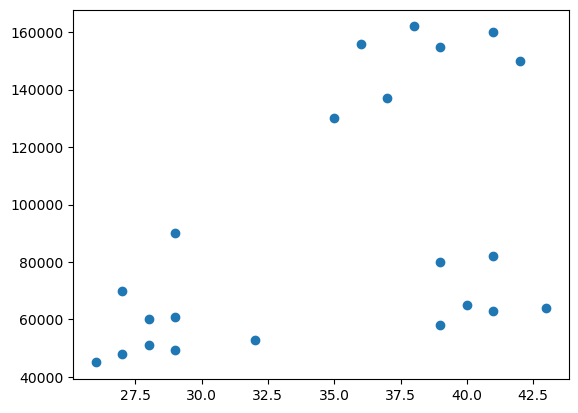

In [5]:
plt.scatter(df['Age'], df['Income'])

In [34]:
km = KMeans(n_clusters=3)

In [35]:
km

KMeans(n_clusters=3)

In [36]:
y_predicted = km.fit_predict(df[["Age", "Income"]])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [37]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohen,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


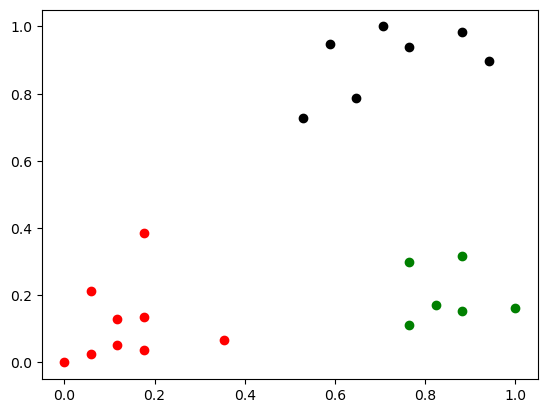

In [38]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='red')
plt.scatter(df3.Age, df3.Income, color='black')

- Problematic as features are not scaled
- Income 40,000 -> 165,000
- Age 25-45
- Income will completely dominate unless scaled. If you don't scale the data you might forget about age as the scale for income is 1000 bigger

In [39]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df['Income'].values.reshape(-1, 1))

C:\Users\johnl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [40]:
df


,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohen,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Guatam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [41]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df['Age'].values.reshape(-1, 1))

C:\Users\johnl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [42]:
df


,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohen,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Guatam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [43]:
y_predicted = km.fit_predict(df[["Age", "Income"]])
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohen,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


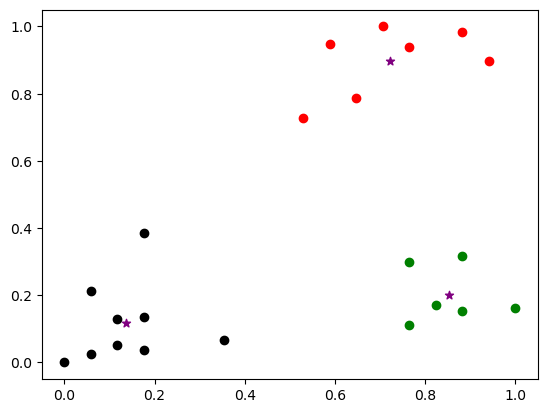

In [44]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='red')
plt.scatter(df3.Age, df3.Income, color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

In [45]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [47]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

In [48]:
sse


[5.434011511988176,
 2.345614491472593,
 0.4750783498553095,
 0.3491047094419565,
 0.33284248355621304,
 0.268143972340583,
 0.19410943615391607,
 0.13717729016208893,
 0.13219563746912694]

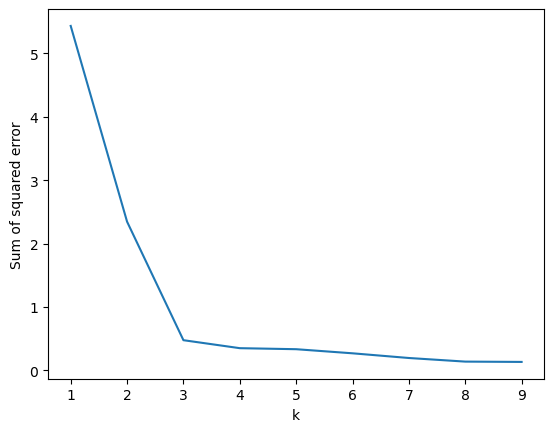

In [49]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

**DBSCAN**
- Density based Spatial Clustering for Applications with Noise
- Clusters are dense regions in the data space, separated by regions of lower density
- DBSCAN is based on an intuitive notion of "clusters" and "noise"
- The key idea is that for each point of a cluster, the neighbourhood of a given radius has to contain at least a given number of points
- Partitioning methods (k-means) and hierarchical clustering work for finding spherical shaped or convex clusters. In other words, they are suitable for compact and well-separated clusters. They are also severely impacted by the presence of noise or outliers
- Real life data can contain clusters of arbitrary shapes and can contain noise

**Parameters required for DBSCAN**
- **$\epsilon$** It defines the neighbourhood around a data point. If the distance between two points is less than or equal to $\epsilon$ then they are considered neighbours. If the $\epsilon$ value is chosen too small then a large part of the data will considered outliers. One way to find the $\epsilon$ value is based on the k-distance graph
- **MinPts** Minimum number of neighbours (data points) with $\epsilon$ radius. The larger the dataset the larger the value of MinPts should be. As a general rule, the minmum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value must be at least 3

In this alogorithm there are three different types of points:
- **Core Point** A point is a core point if it has more than or equal MinPts with $\epsilon$
- **Border Point** A point which has fewer than MinPts with $\epsilon$ but is in the neighbourhood of a core point
- **Noise or outlier** A point which is not a core point or a border point

**Steps for DBSCAN clustering algorithm**
- Find all the points within $\epsilon$ and identify core points with more than or equals to MinPts in their neighbourhood
- For each core point if it not already assigned to a cluster assign them to the same cluster as the core point
- Recursively find all connected points and assign them to the same cluster as the core points. Points a and b are connected if there exists a point c with a sufficient number of points in its neighbourhood and both points a nd b are $\epsilon$ apart. This is chaining process. So if b is neighbour of c, c is neighbour of d, and d is a neighbour of e which in turn is a neighbour of a  then b is a neighbour of a
- Iterate through the remaining points. Points that don't belong to a cluster are noise

**Pseudo code for DBSCAN**
- DBSCAN(datasets, $\epsilon$, MinPts)
- C = 1
- for each unvisited point p in the dataset
- mark p as visited
- find # neighbours of p
- Neighbours N = find neighbouring points of p
- If |N| >= MinPts:
- Add p to C
- If p is a border point add to C
- If p is an outlier don't join to anything 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs


In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

In [3]:
X

array([[ 1.03992529,  1.92991009],
       [-1.38609104,  7.48059603],
       [ 1.12538917,  4.96698028],
       [-1.05688956,  7.81833888],
       [ 1.4020041 ,  1.726729  ],
       [ 3.20722587,  0.36765575],
       [-1.76133611,  1.81716162],
       [ 1.34081536,  4.36827878],
       [-0.37881944,  8.33265721],
       [-0.80062564,  8.52294205],
       [-1.68146124,  2.80114893],
       [-2.43304923,  8.26748617],
       [ 1.19820169,  4.47062449],
       [-2.06457304,  7.05157615],
       [ 1.55515985,  0.12527811],
       [ 0.5408715 ,  4.0143625 ],
       [ 1.05374379,  4.49286859],
       [ 2.48368283,  0.57215086],
       [-1.14357242,  3.09602867],
       [-1.15330985,  2.32340978],
       [ 2.60509732,  1.22529553],
       [ 1.82346953,  1.1384044 ],
       [ 0.77468161,  4.91500986],
       [-1.91821859,  2.86268761],
       [-1.85305081,  2.65728761],
       [-0.30022483,  4.63059663],
       [ 1.7571105 ,  0.87138001],
       [ 0.65834704,  4.64200397],
       [-2.65468613,

In [4]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

{0, 1, 2, 3}


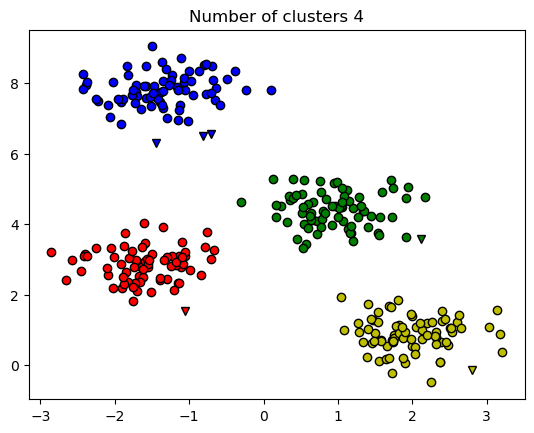

In [36]:
db = DBSCAN(eps=0.9, min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#Number of clusters in the labels, ignoring noise if it is present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#Plot result
#Black will be used for noise

border_points_mask = (labels!=-1) & (~core_samples_mask)
unique_labels = set(labels)
print(unique_labels)
colours = ['y', 'b', 'g', 'r', 'k']
for k, col in zip(unique_labels, colours): # 0, 1, 2, 3, -1
    class_member_mask = (labels == k)
    class_member_mask
    x_core = X[class_member_mask & core_samples_mask]
    plt.plot(x_core[:, 0], x_core[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

    x_outlier = X[class_member_mask & (labels==-1)]
    plt.plot(x_outlier[:, 0], x_outlier[:, 1], 'x', markerfacecolor=col, markeredgecolor='k', markersize=6)

    x_border = X[class_member_mask & border_points_mask]
    plt.plot(x_border[:, 0], x_border[:, 1], 'v', markerfacecolor=col, markeredgecolor='k', markersize=6)
     
plt.title(f"Number of clusters {n_clusters}")
plt.show()
    

    
        


**Evaluation metrics for DBSCAN**
- Silhouette score is in the range from -1 to 1. A score of 1 denotes that a cluster is very compact. The worst value is -1. Values near 0 indicate overlapping clusters.
- Absolute Rand Score is in the range from 0 to 1. More than 0.9 denotes excellent cluster, above 0.8 good. Less than 0.5 is poor.

In [37]:
sc = metrics.silhouette_score(X, labels)

In [38]:
sc

0.7356713838266389

In [40]:
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(y, labels)
ars

1.0

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [44]:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

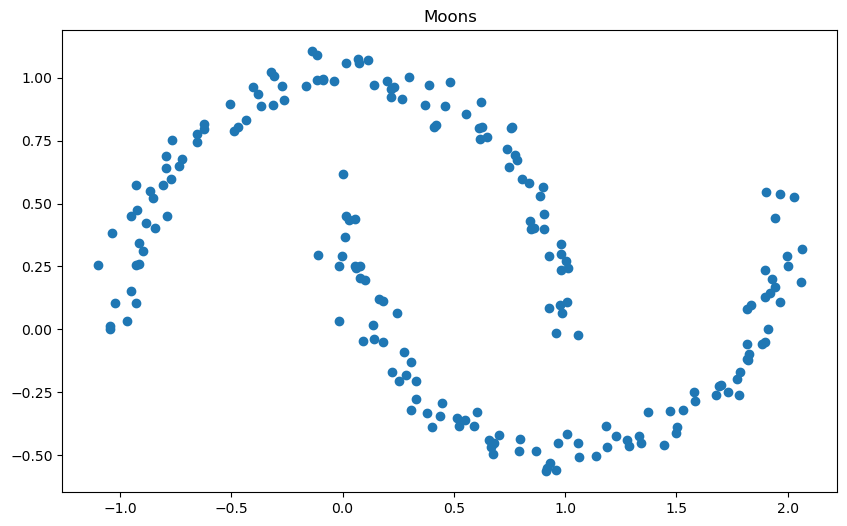

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Moons")
plt.show()

In [60]:
#Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel(f'{k}-th nearest neighbour distance')
    plt.title("K-distance graph")
    plt.show()

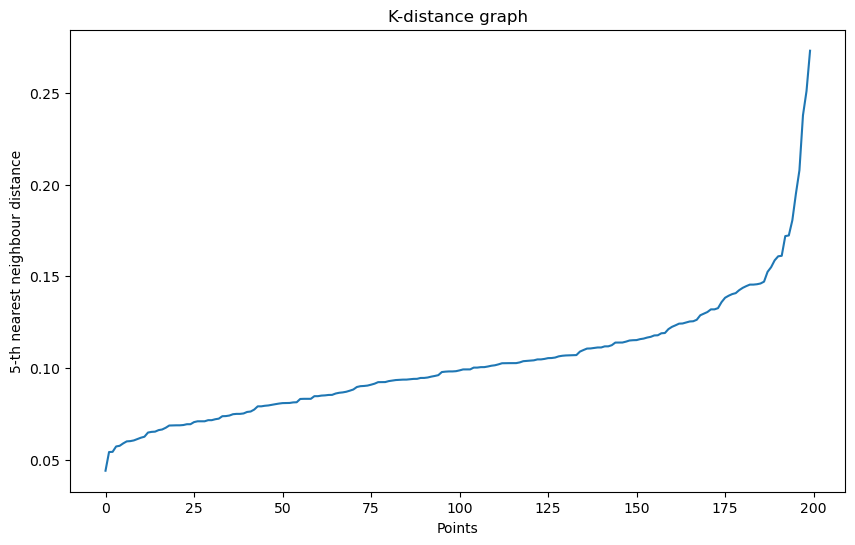

In [61]:
plot_k_distance_graph(X, k=5)

In [62]:
epsilon = 0.15
min_samples = 5 # >=3 Num features + 1
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

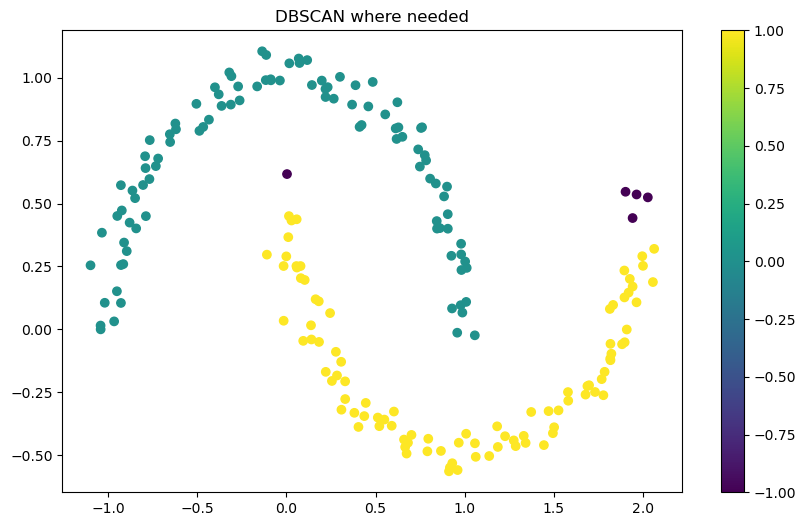

In [63]:
#Visualise the results
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title("DBSCAN where needed")
plt.show()

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

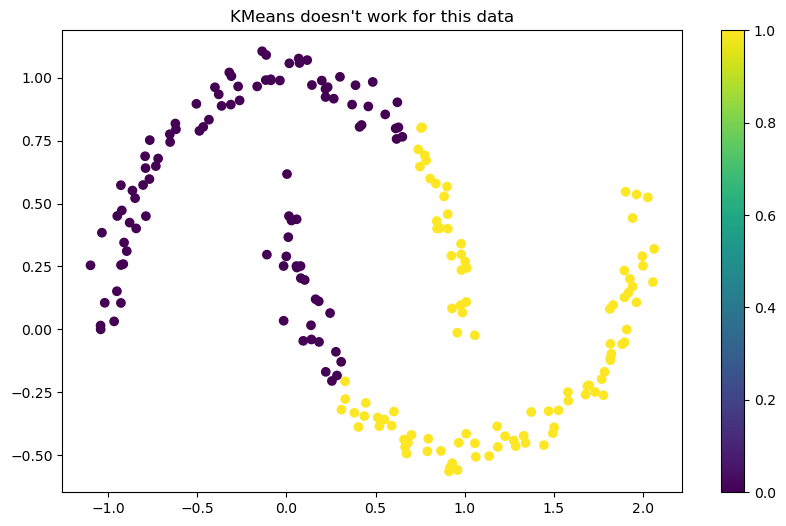

In [65]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title("KMeans doesn't work for this data")
plt.show()

**Difference between DBSCAN and k-means**
|DBSCAN|k-means|
|--|--|
|In DBSCAN we need not specify the number of clusters|k-means is very sensitive to the number of clusters so k needs to be specified|
|Clusters formed in DBSCAN can be any arbitrary shape|Clusters formed in k-means are spherical or convex|
|DBSCAN can work well with datasets that have noise and outliers|k-means does not work well with outliers. Outliers can skew the clusters massively|
|In DBSCAM two parameters are required for training the model|In k-means we only need one parameter|